In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.read_pickle('BL_RL_N_malignanCells.pkl').dropna()
df.head()

,tipoCelula,entidad,historia,frotis,archivos,Hairiness,RBCproximity,Area_cel,EquivDiameter_cel,Eccentricity_cel,...,Gra_R_kurto_cyt,Gra_G_kurto_cyt,Gra_R_kurto_cel,Gra_G_kurto_cel,Pgra_R_kurto_nuc,Pgra_G_kurto_nuc,Pgra_R_kurto_cyt,Pgra_G_kurto_cyt,Pgra_R_kurto_cel,Pgra_G_kurto_cel
0,BL,LAM_MIELOMONOCITICA,244,2015-07-10,BL_12988251.jpg,30,0.162759,14877,137.629883,0.636370,...,2.514249,2.510239,2.220790,2.359441,4.156459,3.887811,2.079814,2.272145,3.765465,3.975058
1,BL,LAM_MIELOMONOCITICA,244,2015-07-10,BL_12988252.jpg,0,0.080415,8645,104.914994,0.407590,...,5.371937,4.301272,2.274587,1.908660,2.767560,2.370320,3.275449,3.677901,3.475912,3.286152
2,BL,LAM_MIELOMONOCITICA,244,2015-07-10,BL_12988257.jpg,4,0.182350,17277,148.316417,0.734669,...,2.331373,2.248804,2.143897,2.283631,4.428359,4.107240,2.894253,3.615403,4.103185,4.413200
3,BL,LAM_MIELOMONOCITICA,244,2015-07-10,BL_12988258.jpg,45,0.231731,17225,148.093049,0.744847,...,2.788552,2.383404,2.410256,2.460834,4.048826,3.627382,2.358728,3.380994,3.788008,3.962579
4,BL,LAM_MIELOMONOCITICA,244,2015-07-10,BL_12988260.jpg,17,0.176995,17804,150.561472,0.380513,...,2.009028,1.958559,2.338617,2.312970,4.532434,4.203701,2.467091,3.286795,4.117840,4.336945


In [7]:
X = df.drop(columns=['tipoCelula','entidad','historia','frotis','archivos'])
y = df['tipoCelula']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=43)

In [12]:
glm = LogisticRegression().fit(X_train,y_train)
y_pred = glm.predict(X_test)

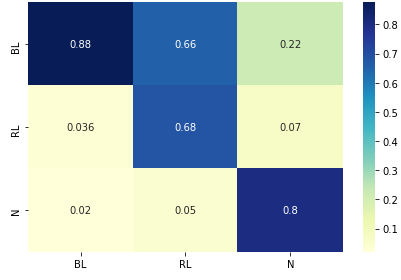

In [35]:
CM = confusion_matrix(y_pred,y_test,labels=['BL','RL','N'])
CM = np.resize(CM,new_shape=[3,3])
CM = CM/np.sum(CM,axis=1) 
CM = pd.DataFrame(CM, index = ['BL','RL','N'], columns=['BL','RL','N'])
sns.heatmap(CM,annot=True,cmap = 'YlGnBu')
plt.tight_layout()
plt.show()